In [1]:
from typing import Mapping, Any, Sequence
import copy
import os
import os.path
import functools

In [2]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import pathlib
import importlib

In [3]:
import ray
import tensorflow as tf

2024-05-30 08:15:11,310	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-30 08:15:11.669303: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 08:15:11.736773: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 08:15:11.738267: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 08:15:13.613063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from exps import dataproc, plotting

In [6]:
from daaf import estimator_metrics

In [7]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1716566007/1716980395/metrics/*.parquet")

In [8]:
df_metrics = dataproc.read_data(files)

2024-05-30 08:15:18,043	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
2024-05-30 08:15:19,669	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/home/guilherme/.pyenv/versions/3.9.16/envs/rl_daaf_py39/lib/python3.9/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


[dataset]: Run `pip install tqdm` to enable progress reporting.


(_execute_read_task_split pid=493905) /home/guilherme/.pyenv/versions/3.9.16/envs/rl_daaf_py39/lib/python3.9/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
(_execute_read_task_split pid=493905)   return transform_pyarrow.concat(tables)
/home/guilherme/.pyenv/versions/3.9.16/envs/rl_daaf_py39/lib/python3.9/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)
(raylet) Spilled 3322 MiB, 200 objects, write throughput 361 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(_execute_read_task_split pid=493861) /home/guilherme/.pyenv/versions/3.9.16/envs/rl_daaf_py39/lib/python3.9/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'. [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to d

In [9]:
df_metrics.head()

,episode,exp_id,meta,state_values,over_states_then_runs,over_runs_then_states,vector_metrics,method
0,6270,1716566007-1091bea7-FrozenLake-v1,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","{'data': [0.011961722488038262, 0.009264024704...","{'mae': [0.005973168911930445, 0.0051276356051...","{'mae': [0.001555023923444985, 0.0015340375985...","{'cosine_distance': [0.0007040444702354209, 0....",PP/DMR
1,6270,1716566007-10b4c635-IceWorld,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","{'data': [-25.053456760678344, -28.20192254655...","{'mae': [9.469056141634109, 9.43690786254997, ...","{'mae': [13.858600717819291, 14.17897570414329...","{'cosine_distance': [0.025121815230380484, 0.0...",PP/IMR
2,6270,1716566007-103d3d47-IceWorld,"{'algorithm': 'one-step-td', 'algorithm_args':...","{'data': [-70.49715855474824, -64.189536087449...","{'mae': [14.599453999562895, 16.61868687352537...","{'mae': [39.04059408594078, 31.270550535051058...","{'cosine_distance': [0.0033142228313789435, 0....",PP/DMR
3,6270,1716566007-10bfa8ea-RedGreenSeq,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","{'data': [-23.988836910853713, -20.95949147787...","{'mae': [0.025659584822930428, 0.0560340678524...","{'mae': [0.06793671464217041, 0.07664429016675...","{'cosine_distance': [2.737807649033641e-06, 6....",PP/LEAST
4,6270,1716566007-4251af8a-ABCSeq,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","{'data': [-99.93206216426289, -90.284693867429...","{'mae': [0.303670676672408, 0.2587489404237823...","{'mae': [0.38279888724605654, 0.36793490828905...","{'cosine_distance': [7.4818098292350754e-06, 4...",PP/LEAST


In [10]:
df_metrics.iloc[0]

episode                                                               6270
exp_id                                   1716566007-1091bea7-FrozenLake-v1
meta                     {'algorithm': 'first-visit-mc', 'algorithm_arg...
state_values             {'data': [0.011961722488038262, 0.009264024704...
over_states_then_runs    {'mae': [0.005973168911930445, 0.0051276356051...
over_runs_then_states    {'mae': [0.001555023923444985, 0.0015340375985...
vector_metrics           {'cosine_distance': [0.0007040444702354209, 0....
method                                                              PP/DMR
Name: 0, dtype: object

In [11]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'first-visit-mc',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([0.01393975, 0.0116309 , 0.02095296, 0.01047647, 0.01624864,
        0.        , 0.04075153, 0.        , 0.03480618, 0.08816992,
        0.14205315, 0.        , 0.        , 0.17582036, 0.43929117,
        0.        ]),
 'env': {'args': '{"is_slippery": false, "map_name": "4x4"}',
  'level': '4x4',
  'name': 'FrozenLake-v1',
  '_level': 'U75ZLQLLXYRFQE5KOJJGNVQZGQ65U5RVVN3ZV5F4UNYQVK6NGTAAU62O2DKMOEGACNNUQOSWGYYOV7LQHK7GAWG2CL3U3RZJFIEIB5I='},
 'epsilon': 0.0,
 'exp_id': '1716566007-1091bea7-FrozenLake-v1',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 2,
 'run_id': 10,
 'traj_mapping_method': 'DMR'}

In [12]:
envs = dataproc.get_distinct_envs(df_metrics)

In [13]:
envs

{('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}',
 ('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}'}

In [14]:
sorted(envs)

[('ABCSeq', 'n=10'),
 ('ABCSeq', 'n=7'),
 ('FrozenLake-v1', '4x4'),
 ('GridWorld', '4x12'),
 ('IceWorld', '4x4'),
 ('IceWorld', '8x8'),
 ('RedGreenSeq', 'n=9'),
 ('TowerOfHanoi', 'disks=4')]

In [15]:
df_eval_result = dataproc.create_eval_result_data(df_metrics)

In [16]:
df_eval_result["one-step"]

,episode,exp_id,state_values,over_states_then_runs,over_runs_then_states,vector_metrics,method,algorithm,algorithm_args,reward_period,discount_factor,drop_truncated_feedback_episodes,level,name
32,6270,1716566007-4a78c111-ABCSeq,"{'data': [-49.13748006379573, -42.189604558798...","{'mae': [0.1068810347333583, 0.101782889936654...","{'mae': [0.17376396861754487, 0.18497346263527...","{'cosine_distance': [1.2894969271259882e-06, 7...",OP/OT,first-visit-mc,{},2,1.00,False,n=7,ABCSeq
53,6270,1716566007-34154919-ABCSeq,"{'data': [-99.99792663476858, -90.080831796075...","{'mae': [0.1872733993071685, 0.089364590009928...","{'mae': [0.33085324662659515, 0.29644303904114...","{'cosine_distance': [4.876283327015507e-06, 1....",OP/OT,first-visit-mc,{},2,1.00,False,n=10,ABCSeq
74,6270,1716566007-3e4356ce-IceWorld,"{'data': [-158.52105263157898, -156.7966871493...","{'mae': [6.322904435828114, 2.8500360990384745...","{'mae': [0.22282277939651607, 0.38122343560902...","{'cosine_distance': [0.017054956496694307, 0.0...",OP/OT,first-visit-mc,{},2,1.00,False,8x8,IceWorld
108,6270,1716566007-2427d4c5-IceWorld,"{'data': [-38.18931419457736, -36.703672787979...","{'mae': [0.36169482104273265, 0.19954087516121...","{'mae': [0.06994074144124837, 0.08929362143700...","{'cosine_distance': [0.00040715386119105634, 9...",OP/OT,first-visit-mc,{},2,1.00,False,4x4,IceWorld
123,6270,1716566007-17131040-GridWorld,"{'data': [-64712.109863672726, -64697.61344672...","{'mae': [455.7318555783114, 588.5046582465653,...","{'mae': [654.7789995430576, 646.1647925263096,...","{'cosine_distance': [7.470717245716685e-06, 1....",OP/OT,first-visit-mc,{},2,1.00,False,4x12,GridWorld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527824,1370,1716566007-ab8fdb34-IceWorld,"{'data': [-33.99427549874075, -34.123126775520...","{'mae': [83.71840590690925, 84.64791560634633,...","{'mae': [87.48299322573237, 88.03675580387966,...","{'cosine_distance': [0.1251825322198563, 0.135...",PP/LEAST,one-step-td,{},8,0.99,False,8x8,IceWorld
527860,1370,1716566007-c5dbdf7c-IceWorld,"{'data': [-3.6139227903443025, -2.401733636956...","{'mae': [19.6946309463368, 17.704033685681374,...","{'mae': [31.819728781620135, 30.47004472134069...","{'cosine_distance': [0.07150627911268548, 0.02...",PP/LEAST,one-step-td,{},8,1.00,False,4x4,IceWorld
527867,1370,1716566007-d48176b4-ABCSeq,"{'data': [-91.88361876591817, -80.616973348504...","{'mae': [5.61381327751545, 5.387450957453014, ...","{'mae': [8.125245483763889, 7.346616232626832,...","{'cosine_distance': [0.0008135924849113074, 0....",PP/LEAST,one-step-td,{},8,1.00,False,n=10,ABCSeq
527927,1370,1716566007-be9d632b-TowerOfHanoi,"{'data': [-1305.4263253127308, -1046.053745064...","{'mae': [285.06046658752115, 295.1464672757061...","{'mae': [281.8864816482608, 271.06558124195453...","{'cosine_distance': [0.00046186012349402894, 0...",PP/LEAST,one-step-td,{},8,1.00,False,disks=4,TowerOfHanoi


In [17]:
plot_eval_result = functools.partial(
    plotting.plot_eval_result,
    metric_family = "vector_metrics",
    metric_col = "cosine_distance",
    max_episode = np.inf,
    max_reward_period = 8,
    output_dir = "figures/evalerror_cosinedistance"
)

## ABC, n=10, $\gamma=1.0$

first-visit-mc
one-step-td


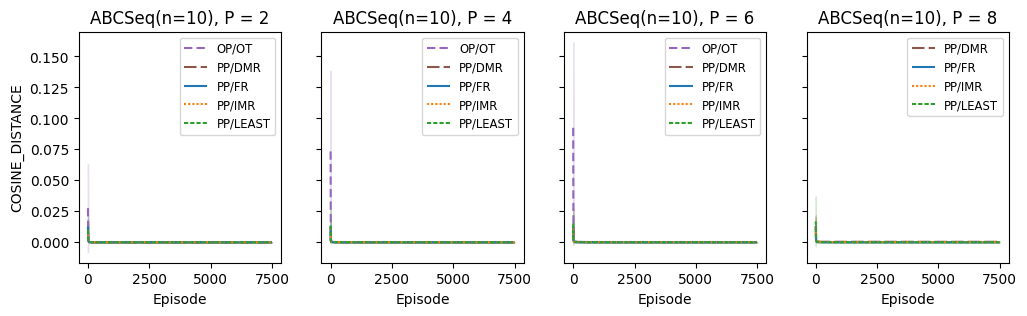

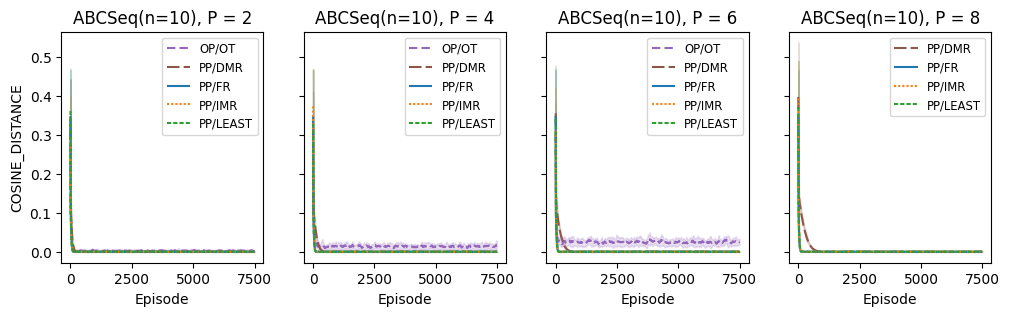

In [18]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


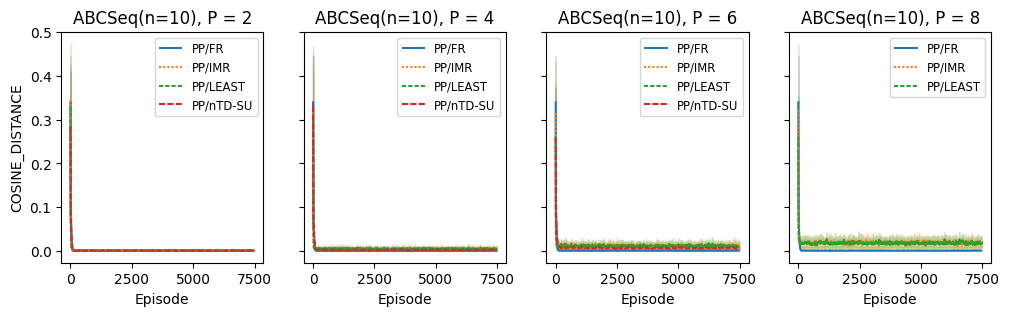

In [19]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=10, $\gamma=0.99$

first-visit-mc
one-step-td


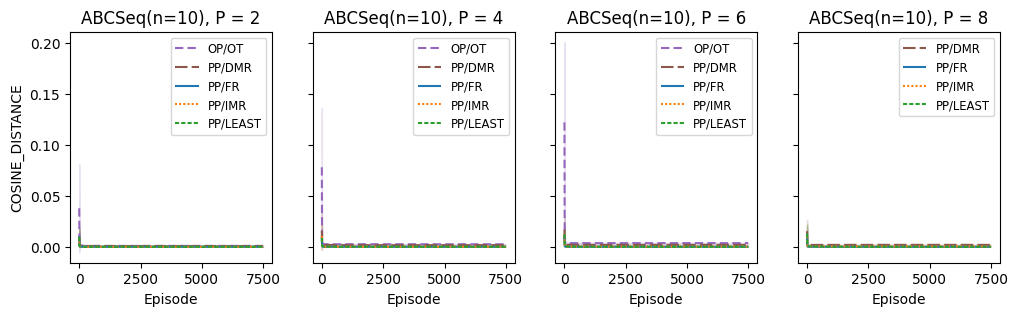

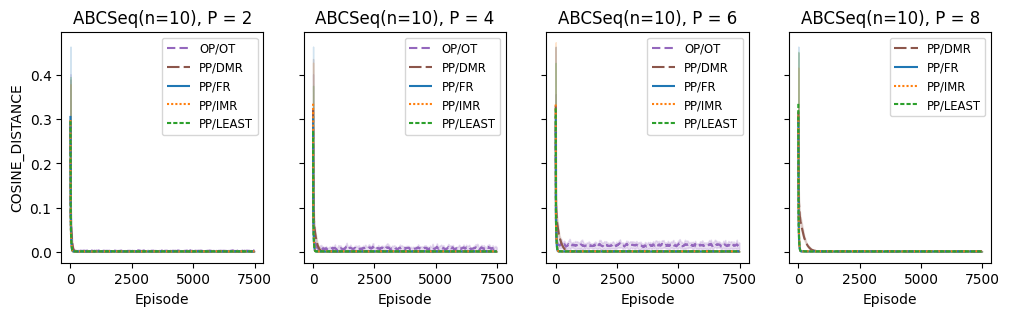

In [20]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


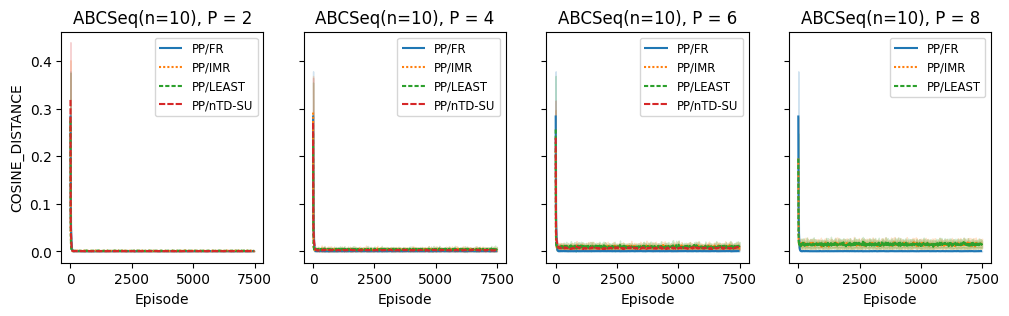

In [21]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=1.0$

first-visit-mc
one-step-td


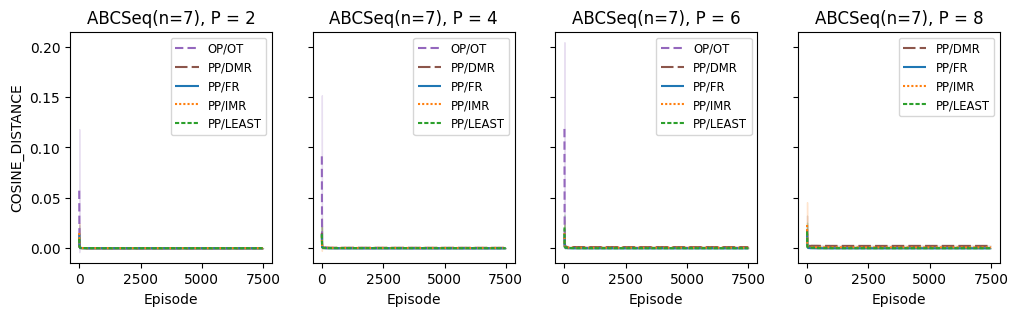

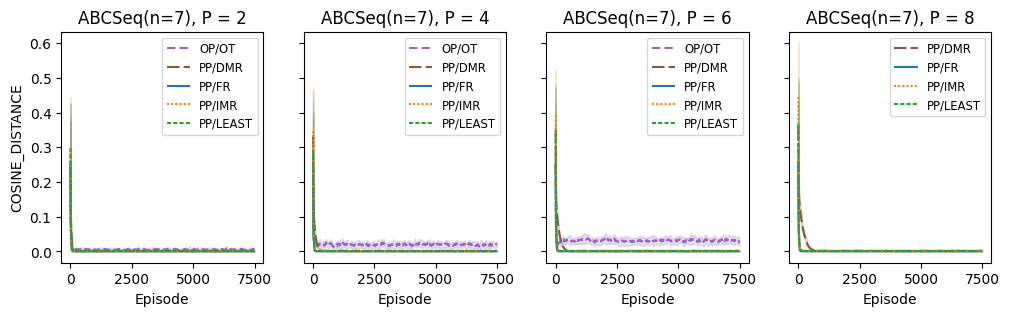

In [22]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


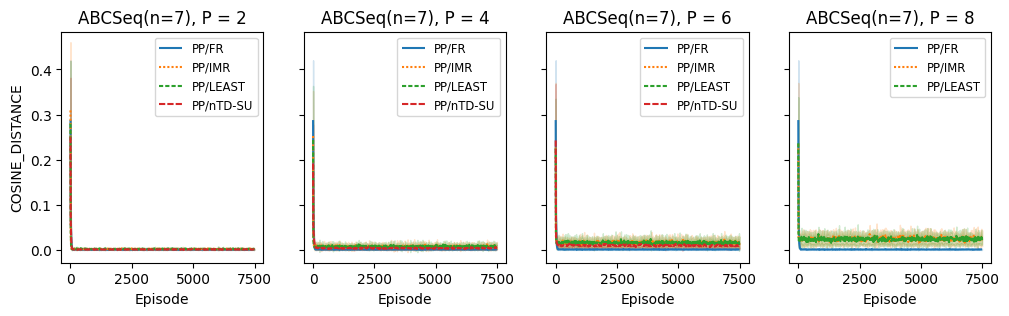

In [23]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,

    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=0.99$

first-visit-mc
one-step-td


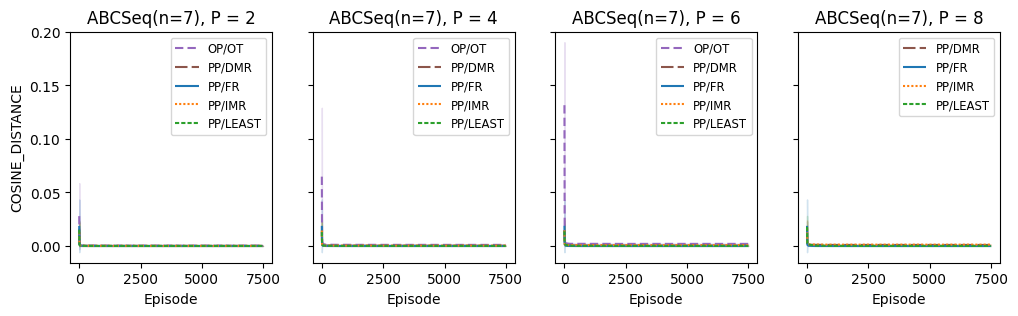

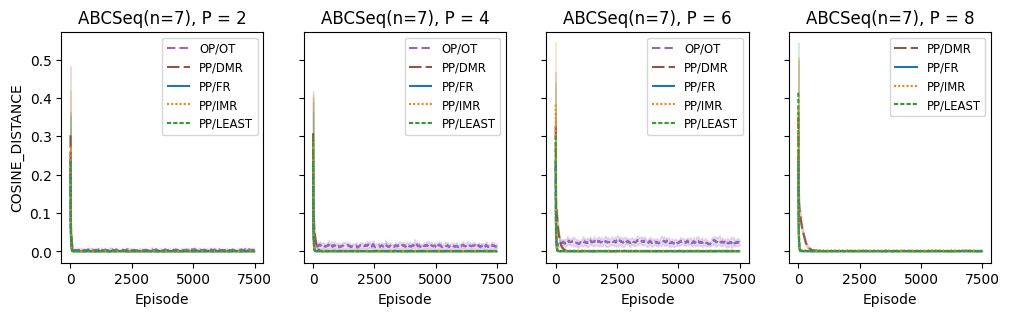

In [24]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


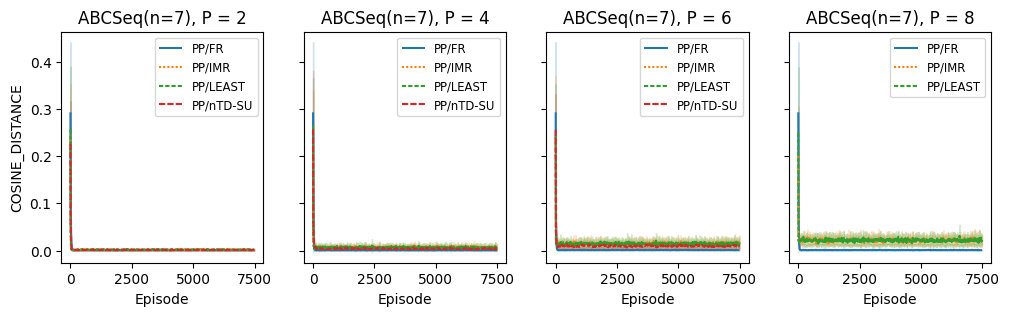

In [25]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=1.0$

first-visit-mc
one-step-td


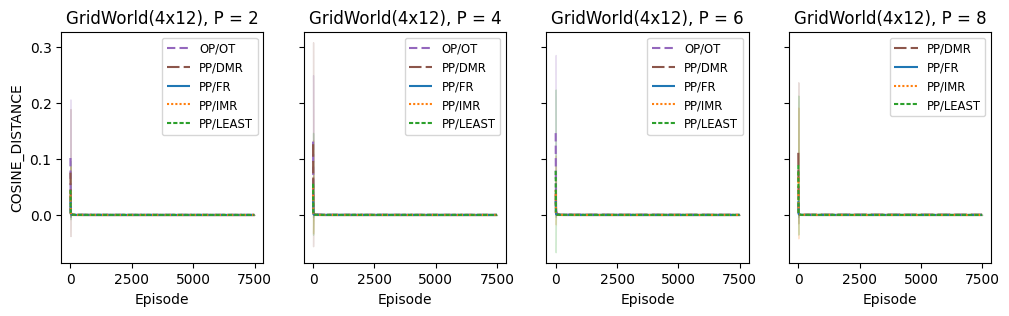

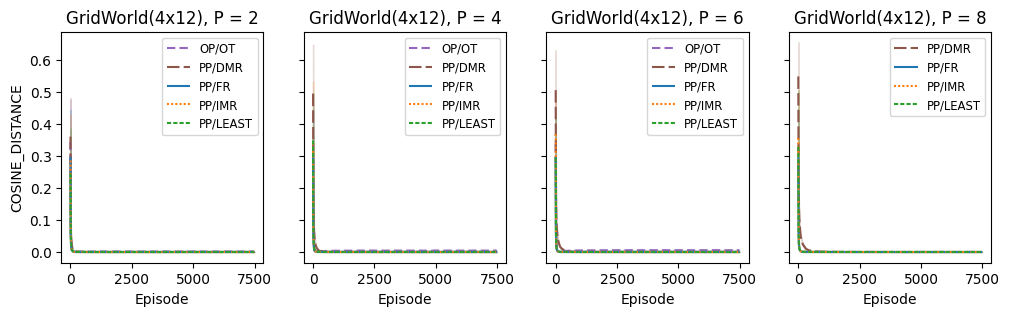

In [26]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


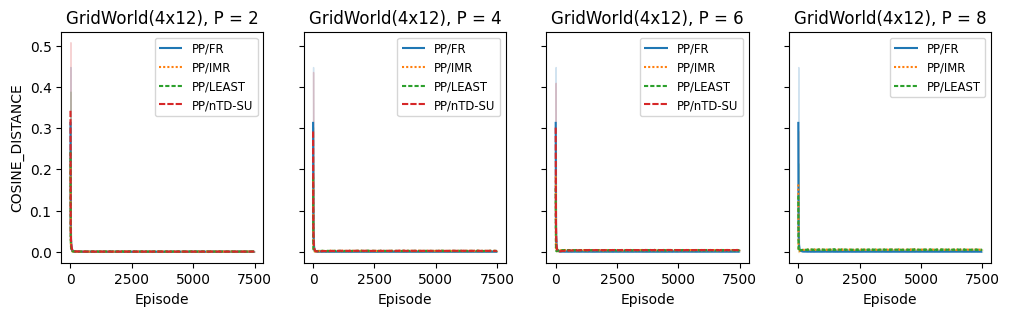

In [27]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=0.99$

first-visit-mc
one-step-td


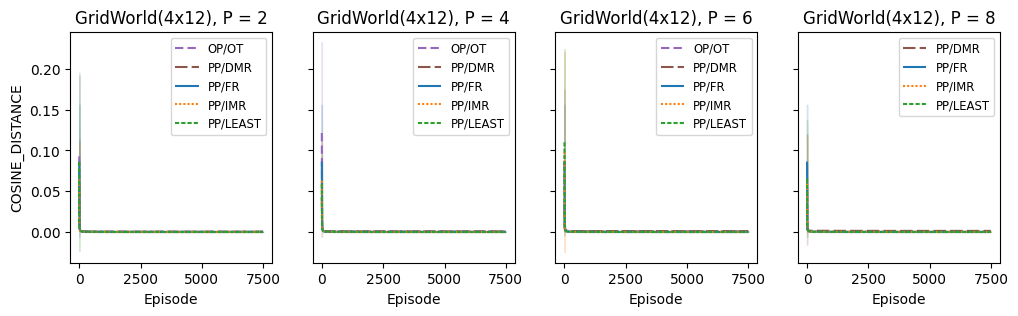

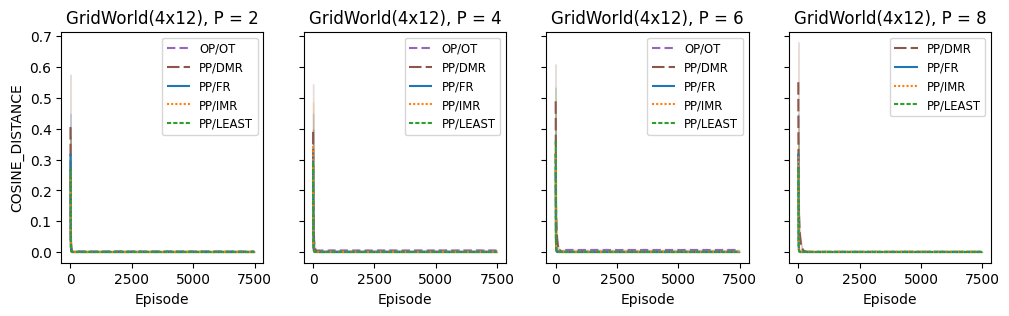

In [28]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


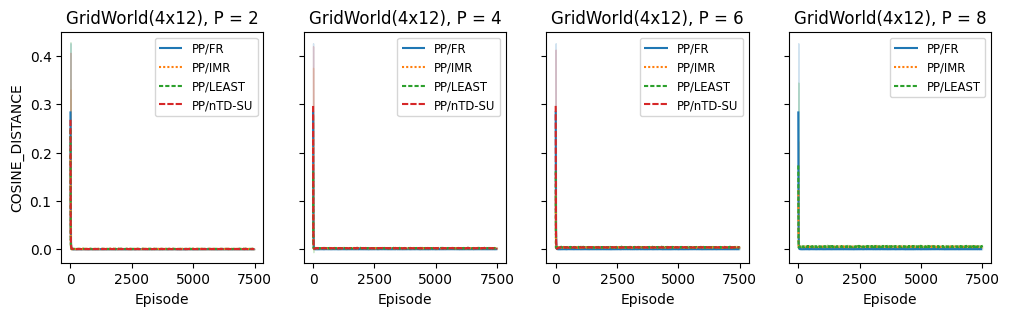

In [29]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=1.0$

first-visit-mc
one-step-td


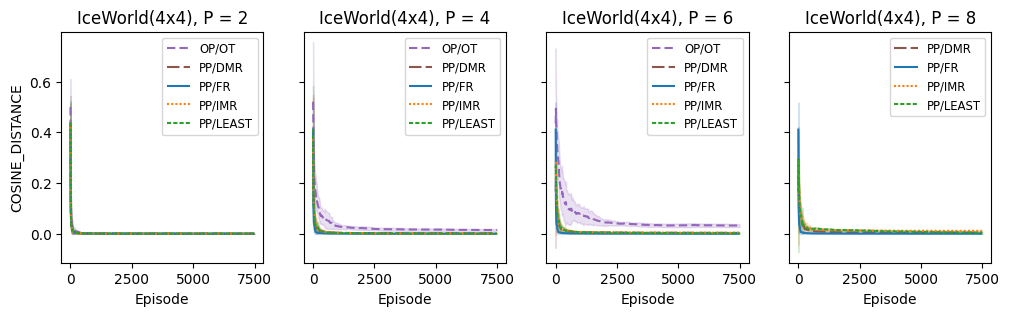

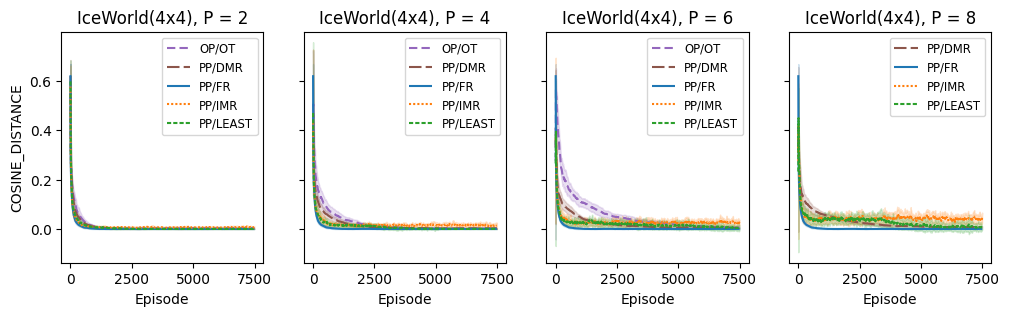

In [30]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


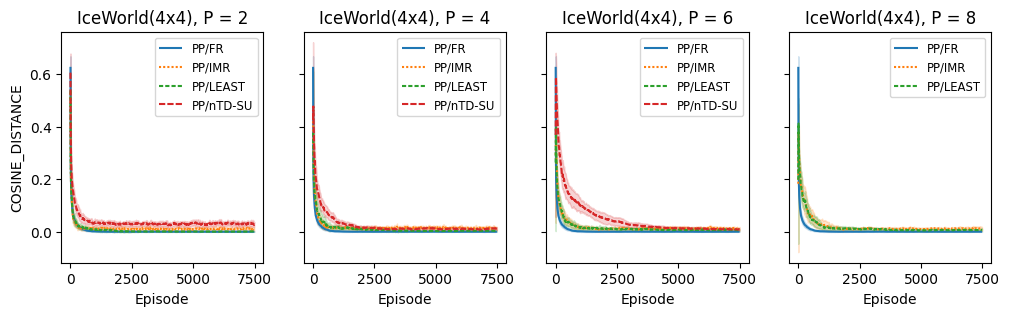

In [31]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=0.99$

first-visit-mc
one-step-td


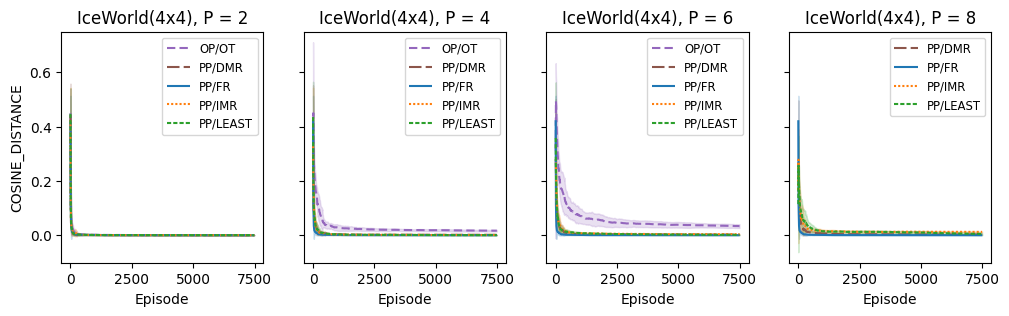

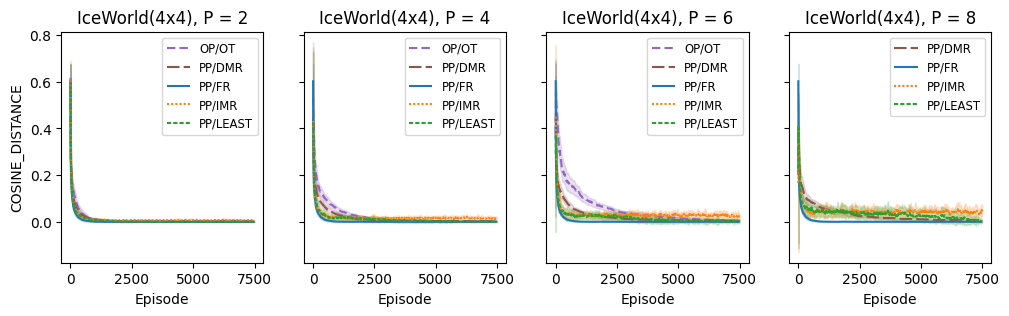

In [32]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


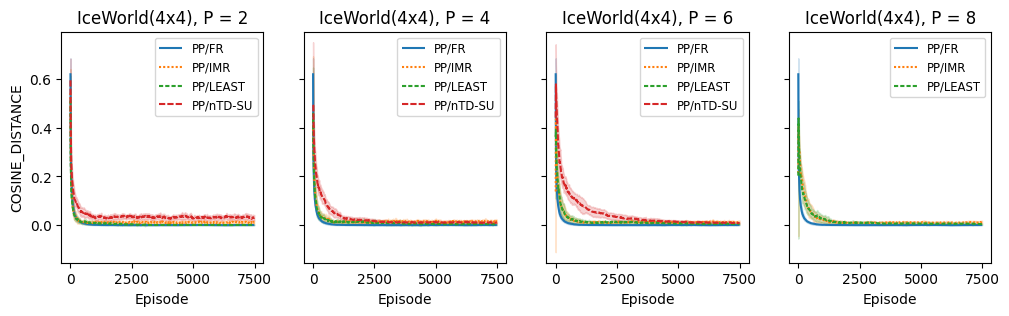

In [33]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=1.0$

first-visit-mc
one-step-td


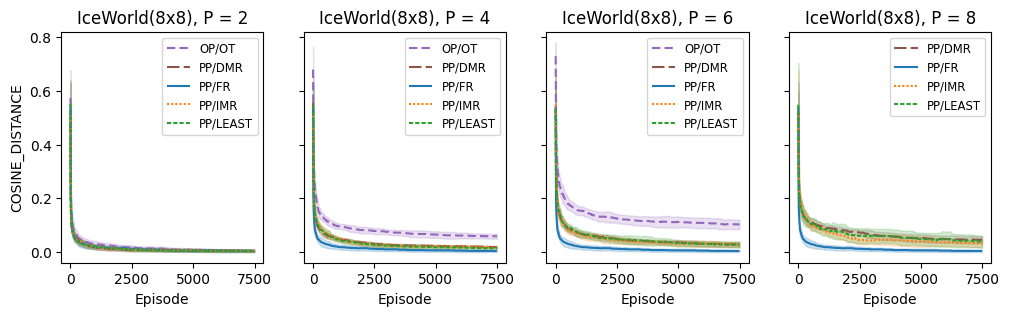

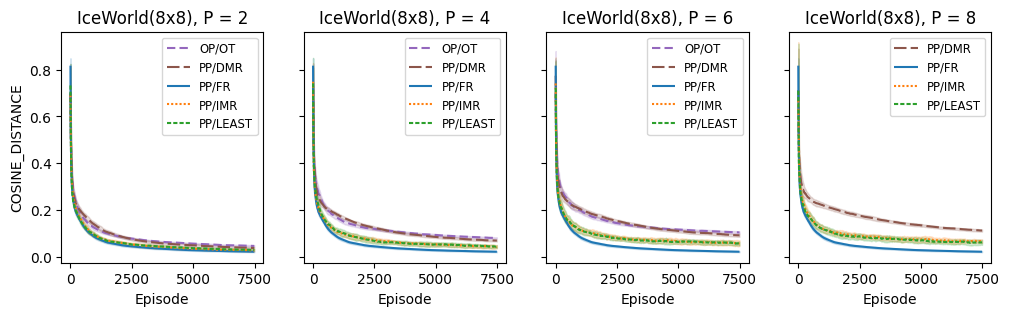

In [34]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


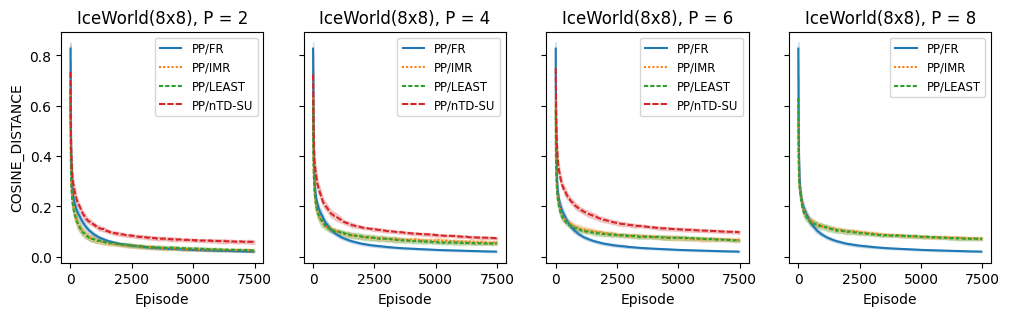

In [35]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=0.99$

first-visit-mc
one-step-td


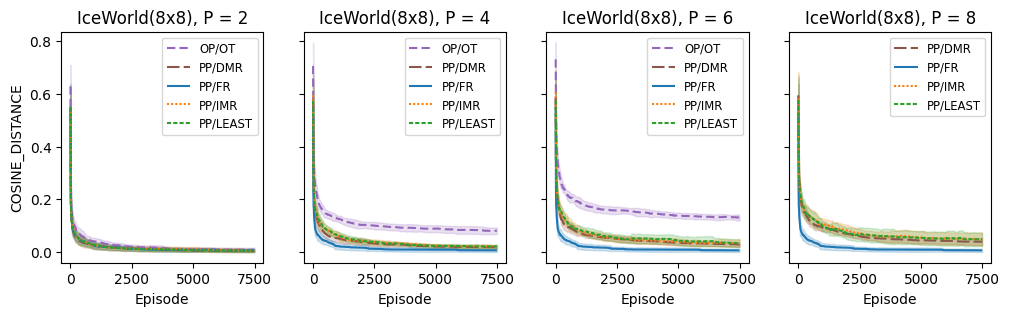

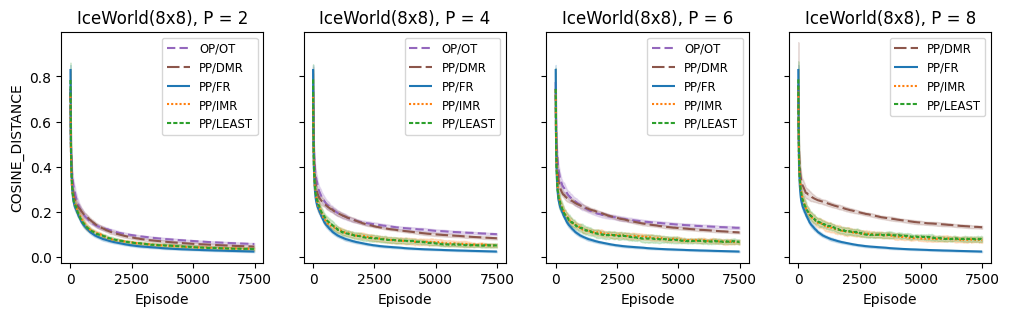

In [36]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


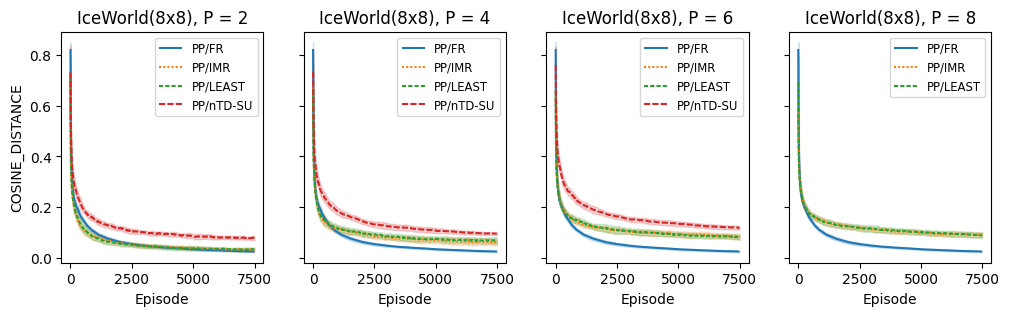

In [37]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=1.0$

first-visit-mc
one-step-td


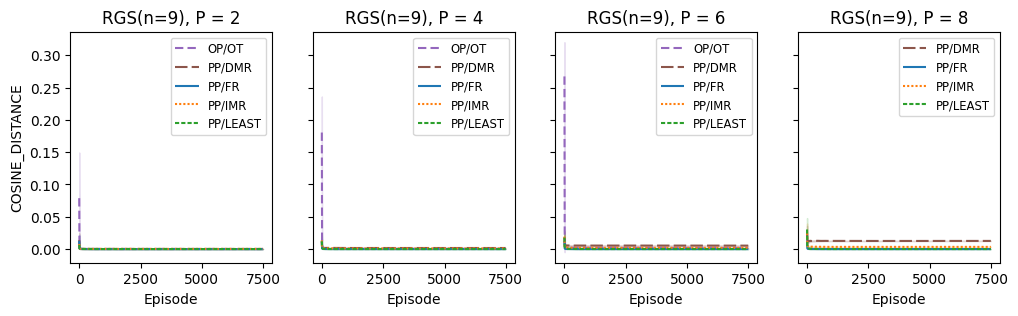

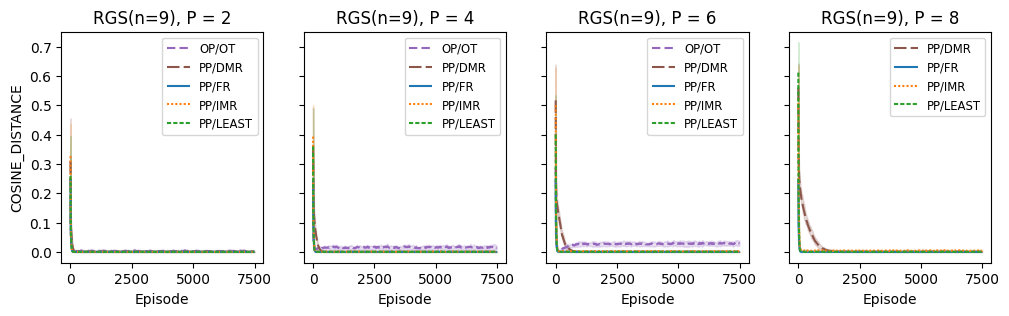

In [38]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


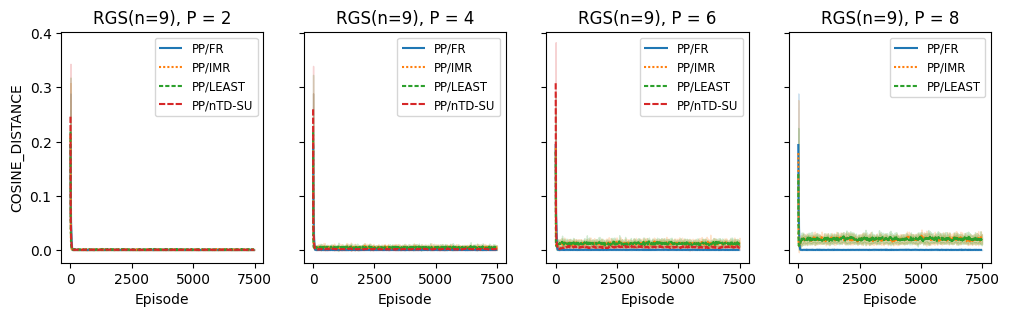

In [39]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=0.99$

first-visit-mc
one-step-td


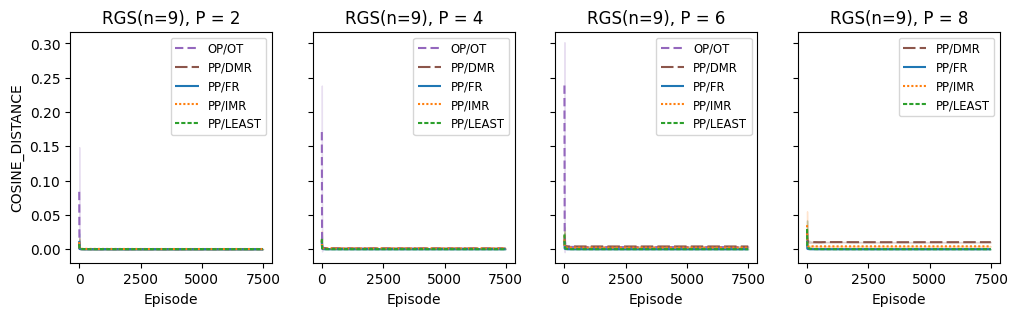

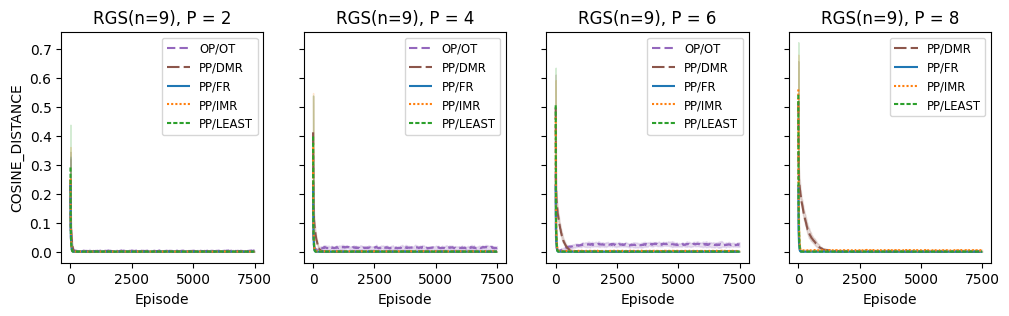

In [40]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


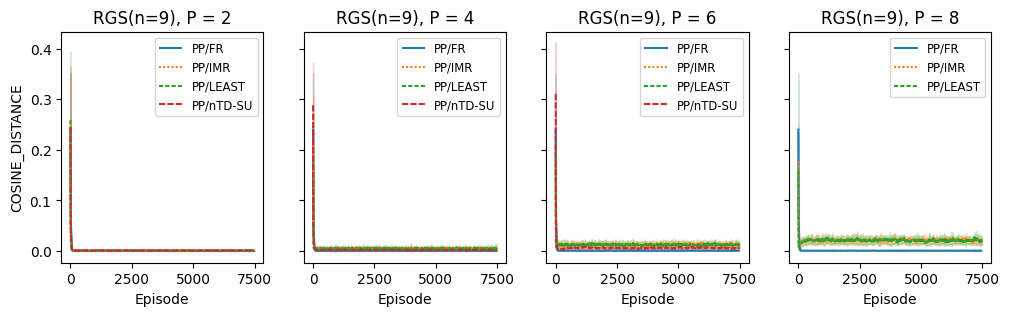

In [41]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=1.0$

first-visit-mc
one-step-td


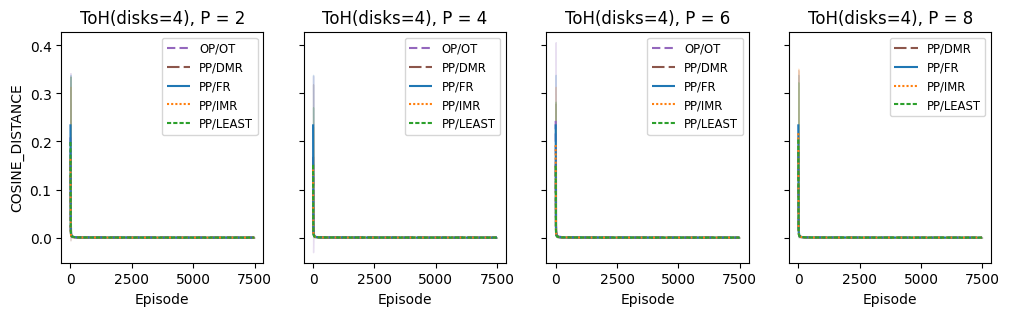

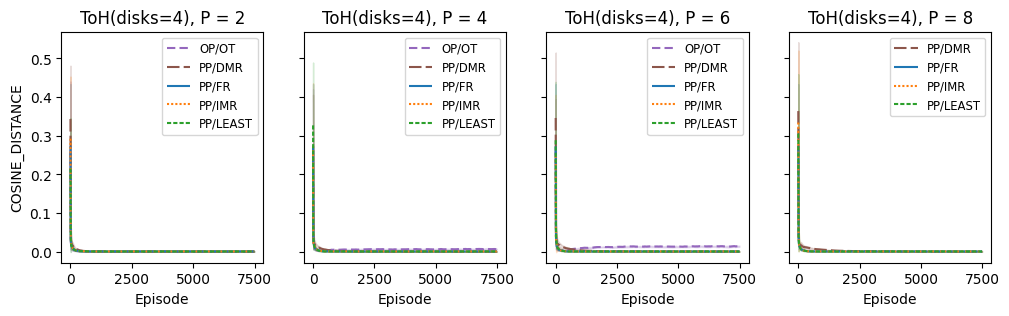

In [42]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


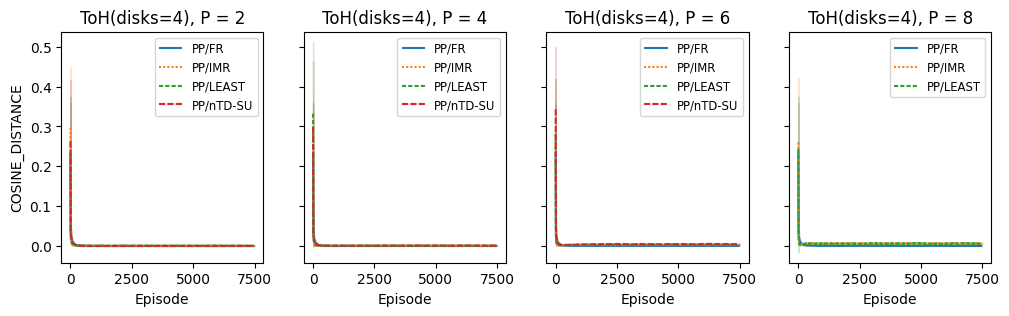

In [43]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=0.99$

first-visit-mc
one-step-td


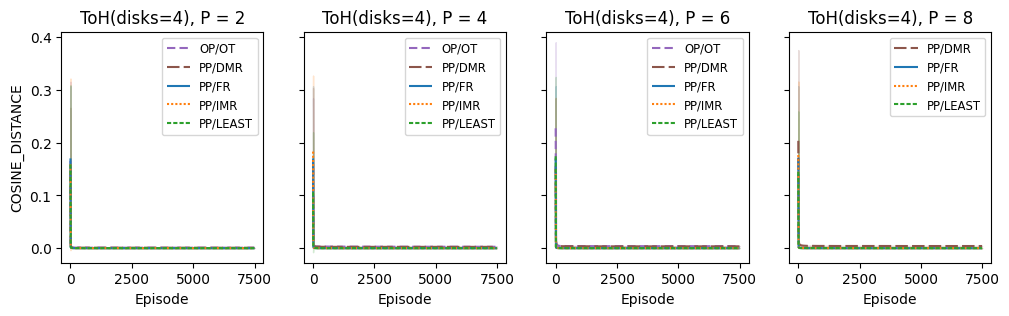

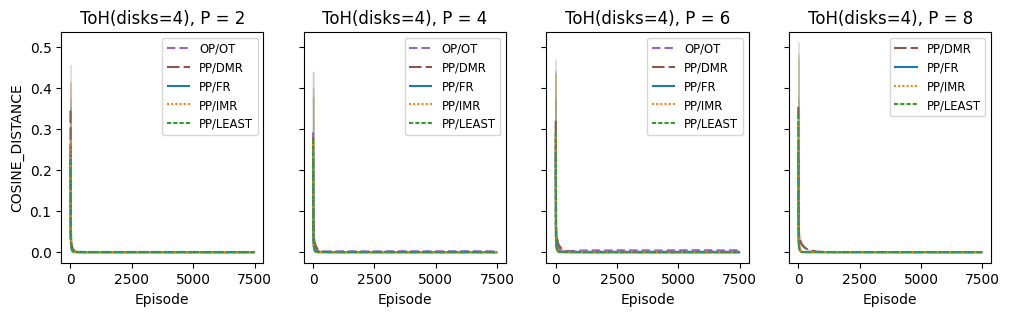

In [44]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


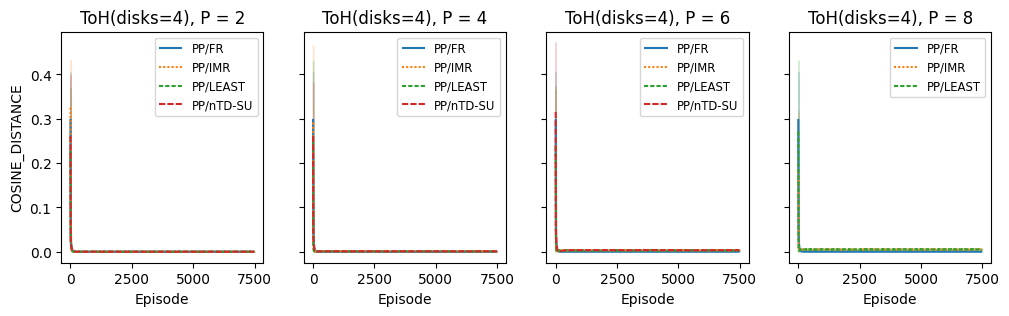

In [45]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## FrozenLake-v1, 4x4, $\gamma=1.0$

first-visit-mc
one-step-td


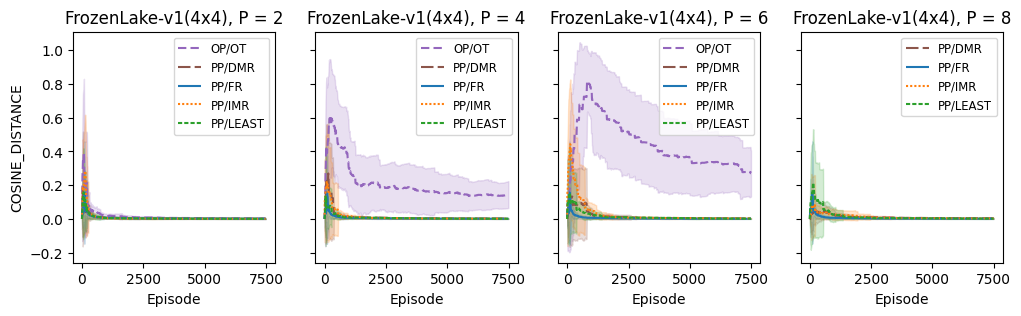

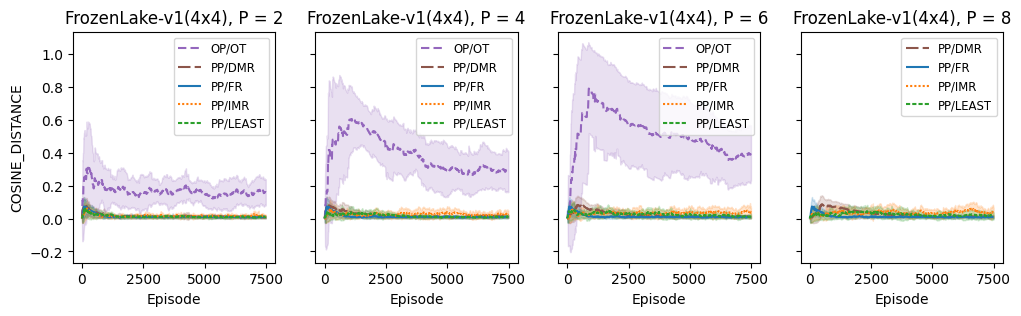

In [46]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


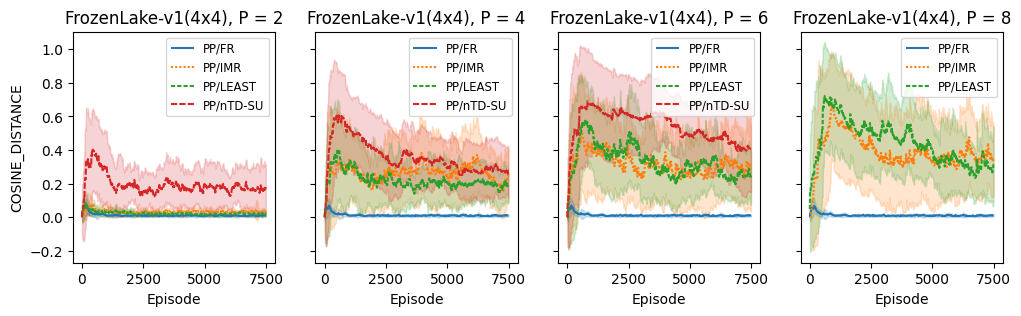

In [47]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## FrozenLake-v1, 4x4, $\gamma=0.99$

first-visit-mc
one-step-td


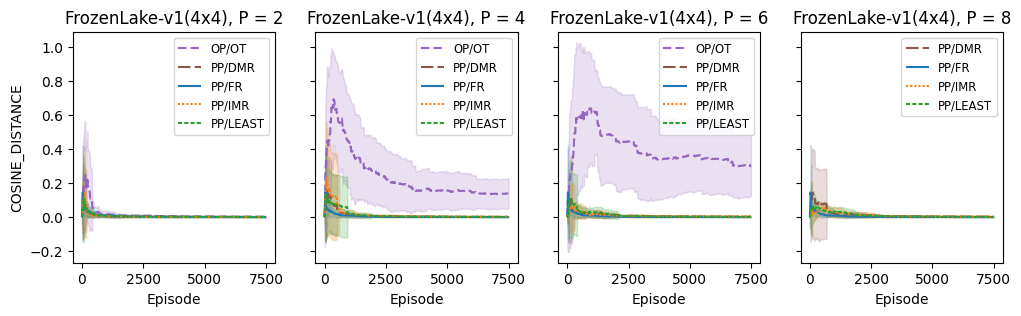

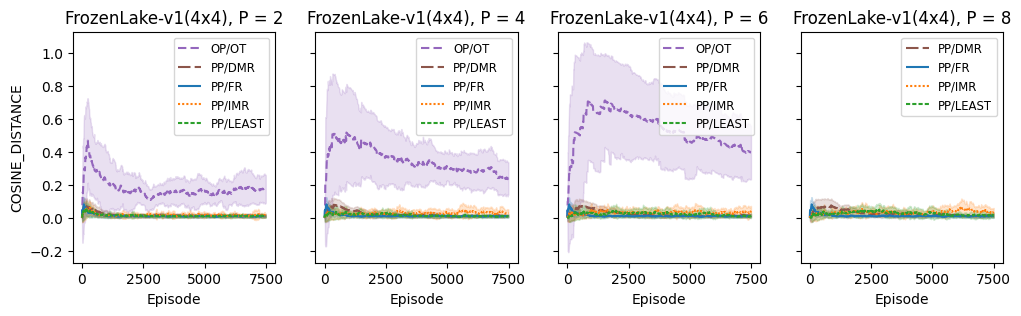

In [48]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


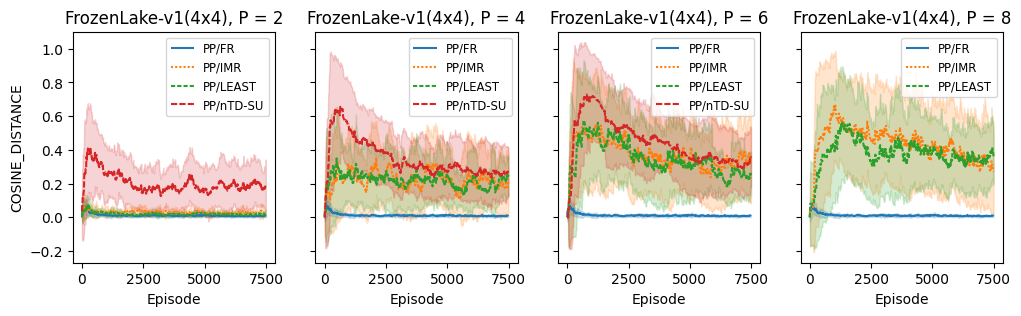

In [49]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)